<a href="https://colab.research.google.com/github/hikmatfarhat-ndu/CSC645/blob/master/sequence_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


# Sequence modelling 

## Coding tutorials
 #### [1.  The IMDb dataset](#coding_tutorial_1)
 #### [2. Padding and masking sequence data](#coding_tutorial_2)
 #### [3. The Embedding layer](#coding_tutorial_3)
 #### [4. The Embedding Projector](#coding_tutorial_4)
 #### [5. Recurrent neural network layers](#coding_tutorial_5)
 #### [6. Stacked RNNs and the Bidirectional wrapper](#coding_tutorial_6)

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [2]:
# Import imdb
import tensorflow.keras.datasets.imdb as imdb 

In [ ]:
# Download and assign the data set using load_data()

(x_train,y_train),(x_test,y_test)=imdb.load_data()


17465344/17464789 [==============================] - 8s 0us/step


#### Inspect the dataset

In [ ]:
# Inspect the type of the data
x_train[0][0:10]


[1, 14, 22, 16, 43, 2, 2, 2, 2, 65]

In [ ]:
# Inspect the shape of the data

x_train.shape

In [ ]:
# Display the first dataset element input
# Notice encoding



In [ ]:
# Display the first dataset element output



#### Load dataset with different options

In [ ]:
# Load the dataset with defaults


# ~/.keras/dataset/

In [ ]:
# Limit the vocabulary to the top 500 words using num_words



In [ ]:
# Ignore the top 10 most frequent words using skip_top



In [ ]:
# Limit the sequence lengths to 500 using maxlen



In [ ]:
# Use '1' as the character that indicates the start of a sequence



#### Explore the dataset word index

In [ ]:
# Load the imdb word index using get_word_index()



In [ ]:
# View the word index as a dictionary,
# accounting for index_from.



In [ ]:
# Retrieve a specific word's index



In [ ]:
# View an input sentence



In [ ]:
# Get the sentiment value



---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [ ]:
# Load the imdb data set
(x_train,y_train),(x_test,y_test)=imdb.load_data()


#### Preprocess the data with padding

In [ ]:
# Inspect the input data shape



In [ ]:
# Pad the inputs to the maximum length using maxlen

x_train_pad=tf.keras.preprocessing.sequence.pad_sequences(x_train,maxlen=300,
padding='post',truncating='pre')

In [ ]:
# Inspect the output data shape

x_train_pad.shape

(25000, 300)

#### Create a Masking layer

In [ ]:
# Import numpy 
import numpy  as np 


In [ ]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims
padded_x_train=np.expand_dims(x_train_pad,-1)


In [ ]:
# Create a Masking layer 
tf_x_train=tf.convert_to_tensor(padded_x_train,dtype='float32')
mask_layer=tf.keras.layers.Masking(mask_value=0,)


In [ ]:
# Pass tf_x_train to it
masked_x_train=mask_layer(tf_x_train)


In [ ]:
# Look at the dataset
masked_x_train.shape
masked_x_train._keras_mask


<tf.Tensor: id=8, shape=(25000, 300), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

In [ ]:
# Look at the ._keras_mask for the dataset



***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [ ]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length

embedding_layer=tf.keras.layers.Embedding(input_dim=501,output_dim=16)
#expects input of the shape
# (batch,sequence,features)

In [ ]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)
sequence=tf.constant([[[0],[1],[5],[500]]])
sequence_of_embeddings=embedding_layer(sequence)
sequence_of_embeddings

<tf.Tensor: id=50, shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[-4.93819825e-02,  4.79670279e-02, -4.96466421e-02,
           3.59516218e-03, -3.58911380e-02,  1.40239261e-02,
           4.77942564e-02,  2.30529942e-02, -3.26102003e-02,
           1.12731382e-03,  2.42405646e-02, -3.24548483e-02,
          -2.46376917e-03, -4.54859845e-02,  1.20875835e-02,
          -1.46036223e-03]],

        [[ 3.30866463e-02, -8.53872299e-03, -4.86984104e-03,
           5.25255129e-03, -2.87134647e-02,  3.80150191e-02,
           8.71196389e-05, -3.77577431e-02,  6.29421324e-03,
           3.86125706e-02, -4.43064235e-02,  2.27995031e-02,
          -1.58297531e-02, -4.99626286e-02,  1.49161108e-02,
          -1.66587718e-02]],

        [[-3.72087471e-02, -8.19934532e-03, -5.69223240e-03,
           1.29581355e-02,  4.24976610e-02, -2.05596928e-02,
          -2.67336722e-02,  4.31881100e-03, -2.25387458e-02,
          -1.73893347e-02, -2.31876615e-02,  4.91886251e-02,
           3.83999683e-0

In [ ]:
# Inspect the Embedding layer weights using get_weights()
# in this case it returns a list of just one element
w=embedding_layer.get_weights()
w[0].shape

(501, 16)

In [ ]:
# Get the embedding for the 14th index
embedding_layer.get_weights()[0][0,:]


array([-0.04938198,  0.04796703, -0.04964664,  0.00359516, -0.03589114,
        0.01402393,  0.04779426,  0.02305299, -0.0326102 ,  0.00112731,
        0.02424056, -0.03245485, -0.00246377, -0.04548598,  0.01208758,
       -0.00146036], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [ ]:
# Create a layer that uses the mask_zero kwarg
masking_embedding_layer=tf.keras.layers.Embedding(input_dim=501,output_dim=16,mask_zero=True)



In [ ]:
# Apply this layer to the sequence and see the _keras_mask property
masked_sequence=masking_embedding_layer(sequence)
masked_sequence._keras_mask

<tf.Tensor: id=74, shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load and preprocess the IMDb data

In [3]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [4]:
# Load the dataset
(x_train,y_train),(x_test,y_test)=get_and_pad_imdb_dataset()


In [5]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [6]:
# Get the word index
imdb_word_index=get_imdb_word_index()


In [7]:
# Swap the keys and values of the word index
inv_imdb_word_index={val:key for key,val in imdb_word_index.items()}


In [9]:
# View the first dataset example sentence
[inv_imdb_word_index[index] for index in x_train[0] if index >2]


['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',
 'end',
 'it',
 'was',
 'so',
 'sad',


#### Build an Embedding layer into a model

In [8]:
# Get the maximum token value

max_index_value=max(imdb_word_index.values())

In [9]:
# Specify an embedding dimension
embedding_dim=16


In [10]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense
model=tf.keras.Sequential([
           tf.keras.layers.Embedding(input_dim=max_index_value+1,output_dim=embedding_dim,mask_zero=False)  ,
           tf.keras.layers.GlobalAveragePooling1D(),
           tf.keras.layers.Dense(units=1,activation='sigmoid')              

]
)


In [20]:
# Functional API refresher: use the Model to build the same model

review_sequence=tf.keras.Input((None,))
embedding_sequence=tf.keras.layers.Embedding(input_dim=max_index_value+1,output_dim=embedding_dim)(review_sequence)
average_embedding=tf.keras.layers.GlobalAveragePooling1D()(embedding_sequence)
positive_prob=tf.keras.layers.Dense(1,activation='sigmoid')(average_embedding)
model=tf.keras.Model(inputs=review_sequence,outputs=positive_prob)

In [21]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_3 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [26]:
# Compile the model with a binary cross-entropy loss
model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer='adam')


In [29]:
# Train the model using .fit(), savng its history

history=model.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_test,y_test),validation_steps=20)

Epoch 1/5
782/782 [==============================] - 6s 8ms/step - loss: 0.4809 - accuracy: 0.8383 - val_loss: 0.4696 - val_accuracy: 0.8094
Epoch 2/5
782/782 [==============================] - 6s 8ms/step - loss: 0.4430 - accuracy: 0.8520 - val_loss: 0.4355 - val_accuracy: 0.8391
Epoch 3/5
782/782 [==============================] - 6s 8ms/step - loss: 0.4108 - accuracy: 0.8622 - val_loss: 0.4082 - val_accuracy: 0.8547
Epoch 4/5
782/782 [==============================] - 6s 8ms/step - loss: 0.3833 - accuracy: 0.8720 - val_loss: 0.3866 - val_accuracy: 0.8625
Epoch 5/5
782/782 [==============================] - 6s 8ms/step - loss: 0.3607 - accuracy: 0.8784 - val_loss: 0.3797 - val_accuracy: 0.8422


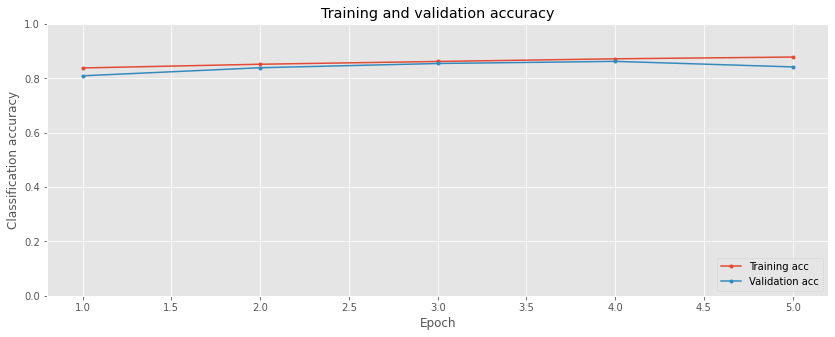

In [30]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [ ]:
# Retrieve the embedding layer's weights from the trained model



In [ ]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open(path.join('data', 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join('data', 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [31]:
# Create a SimpleRNN layer and test it

# input of the form (batch,sequence,features)
simplernn_layers=tf.keras.layers.SimpleRNN(units=16)

In [34]:
# Note that only the final cell output is returned
sequence=tf.constant([[[1.,1.],[2.,2.],[56.,-100]]])
layer_output=simplernn_layers(sequence)
layer_output


<tf.Tensor: shape=(1, 16), dtype=float32, numpy=
array([[-0.9995051 ,  1.        ,  1.        ,  1.        , -1.        ,
        -1.        ,  1.        , -1.        , -1.        ,  1.        ,
         1.        , -1.        , -1.        , -0.98492384,  1.        ,
        -1.        ]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [2]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [4]:
# Load the dataset
num_words=5000
maxlen=300
(x_train,y_train),(x_test,y_test)=get_and_pad_imdb_dataset(num_words=num_words,maxlen=300)

17465344/17464789 [==============================] - 0s 0us/step


In [5]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=5000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [6]:
# Get the word index using get_imdb_word_index()
imdb_word_index=get_imdb_word_index(num_words=num_words)


1646592/1641221 [==============================] - 0s 0us/step


#### Create a recurrent neural network model

In [7]:
# Get the maximum index value

max_index_value=max(imdb_word_index.values())
embedding_dim=128

In [8]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.
model=tf.keras.Sequential([
     tf.keras.layers.Embedding(input_dim=max_index_value+1,output_dim=embedding_dim,mask_zero=True),
     tf.keras.layers.LSTM(units=60),
     tf.keras.layers.Dense(units=1,activation='sigmoid')                
])


#### Compile and fit the model

In [9]:
# Compile the model with binary cross-entropy loss

model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [12]:
# Fit the model and save its training history
history=model.fit(x_train,y_train,epochs=3,batch_size=500,validation_data=(x_test,y_test))


Epoch 1/3
39/39 [==============================] - 28s 713ms/step - loss: 0.1234 - accuracy: 0.9565 - val_loss: 0.3256 - val_accuracy: 0.8778
Epoch 2/3
39/39 [==============================] - 27s 697ms/step - loss: 0.1105 - accuracy: 0.9615 - val_loss: 0.3419 - val_accuracy: 0.8792
Epoch 3/3
39/39 [==============================] - 28s 712ms/step - loss: 0.1010 - accuracy: 0.9656 - val_loss: 0.3521 - val_accuracy: 0.8798


In [11]:
model.evaluate(x_test,y_test)

608/608 [==============================] - 29s 48ms/step - loss: 0.3325 - accuracy: 0.8781


[0.33247852325439453, 0.8781490921974182]

#### Plot learning curves

In [56]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

KeyError: ignored

#### Make predictions with the model

In [58]:
# View the first test data example sentence
# (invert the word index)
inv_imdb_word_index={val:key for key,val in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_test[0] if index >2]



['please',
 'give',
 'this',
 'one',
 'a',
 'miss',
 'br',
 'br',
 'and',
 'the',
 'rest',
 'of',
 'the',
 'cast',
 'rendered',
 'terrible',
 'performances',
 'the',
 'show',
 'is',
 'flat',
 'flat',
 'flat',
 'br',
 'br',
 'i',
 "don't",
 'know',
 'how',
 'michael',
 'madison',
 'could',
 'have',
 'allowed',
 'this',
 'one',
 'on',
 'his',
 'plate',
 'he',
 'almost',
 'seemed',
 'to',
 'know',
 'this',
 "wasn't",
 'going',
 'to',
 'work',
 'out',
 'and',
 'his',
 'performance',
 'was',
 'quite',
 'so',
 'all',
 'you',
 'madison',
 'fans',
 'give',
 'this',
 'a',
 'miss']

In [59]:
# Get the model prediction using model.predict()

model.predict(x_test[None,0,:])

array([[0.10913296]], dtype=float32)

In [60]:
# Get the corresponding label
y_test[0]


0

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDB review sentiment dataset

In [ ]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [ ]:
# Load the dataset



In [ ]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [ ]:
# Get the word index using get_imdb_word_index()



#### Build stacked and bidirectional recurrent models

In [ ]:
# Get the maximum index value and specify an embedding dimension



In [ ]:
# Using Sequential, build a stacked LSTM model via return_sequences=True



In [ ]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'



In [ ]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer



#### Compile and fit the model

In [ ]:
# Compile the model



In [ ]:
# Train the model, saving its history



In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);